### WARNING
Please refrain from using **print statements/anything that dumps large outputs(>500 lines) to STDOUT** to avoid running to into **memory issues**. 
Doing so requires your entire lab to be reset which may also result in loss of progress and you will be required to reach out to Coursera for assistance with this.
This process usually takes time causing delays to your submission.

### Validate Button
Please note that this assignment uses nbgrader to facilitate grading. You will see a **validate button** at the top of your Jupyter notebook. If you hit this button, it will run tests cases for the lab that aren't hidden. It is good to use the validate button before submitting the lab. Do know that the labs in the course contain hidden test cases. The validate button will not let you know whether these test cases pass. After submitting your lab, you can see more information about these hidden test cases in the Grader Output. <br>
***Cells with longer execution times will cause the validate button to time out and freeze. Please know that if you run into Validate time-outs, it will not affect the final submission grading.*** <br>

In [34]:
%matplotlib inline
import numpy as np
import scipy as sp
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set color map to have light blue background
sns.set()
import statsmodels.formula.api as smf
import statsmodels.api as sm

N.B.: I recommend that you use the `statsmodel` library to do the regression analysis as opposed to *e.g.* `sklearn`. The `sklearn` library is great for advanced topics, but it's easier to get lost in a sea of details and it's not needed for these problems.

# 1.  Polynomial regression using MPG data [25 pts, Peer Review]
We will be using Auto MPG data from UCI datasets (https://archive.ics.uci.edu/ml/datasets/Auto+MPG) to study polynomial regression.

In [35]:
columns = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year','origin','car_name']
df = pd.read_csv("data/auto-mpg.data", header=None, delimiter=r"\s+", names=columns) 
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None


,mpg,cylinders,displacement,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


### 1a) Clean the data [5 pts] 

1. Fix data types
2. Remove null or undefined values 
3. Drop the column car_name

Replace the data frame with the cleaned data frame. Do not change the column names, and do not add new columns.

Hint: 1. Dtype of one column is incorrect.  

In [36]:
# replace data frame with cleaned data frame
# fix data types, remove null or undefined values, drop the column car_name
# NOTE: do not change the column names or add new columns 
# your code here
df.drop(columns = ["car_name"], inplace = True)
df['horsepower'].replace('?', np.nan, inplace = True)
df.dropna(inplace = True)
df['horsepower'] = df['horsepower'].astype(float)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 27.6 KB
None


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [4]:
# this cell will test that you properly cleaned the dataframe 

### 1b) Fit a simple linear regression model with a feature that maximizes $R^2$. [5 pts]
Which feature is the best predictor, and the resulting r-squared value? Update your answer below.

In [37]:
# your code here
keys = df.columns.tolist()
keys.pop(0)
rsq_dict = dict.fromkeys(keys)

response = df["mpg"]
best_r_squared = 0
best_predictor = ''

for feature in keys:
    
    # create model and get r2
    predictor = sm.add_constant(df[feature])
    model = sm.OLS(response, predictor)
    result = model.fit()
    r2 = result.rsquared
    rsq_dict[feature] = r2
    
    # compare r2 with previous best
    if r2 > best_r_squared:
        best_r_squared = r2
        best_predictor = feature

print(best_predictor)
print(best_r_squared)
print(rsq_dict)

weight
0.6926304331206254
{'cylinders': 0.6046889889441246, 'displacement': 0.6482294003193044, 'horsepower': 0.6059482578894348, 'weight': 0.6926304331206254, 'acceleration': 0.1792070501562546, 'model_year': 0.33702781330962284, 'origin': 0.3194609386689675}


In [19]:
# this cell will test best_predictor and best_r_squared

### 1c) Using the feature found above (without normalizing), fit polynomial regression up to N=10 and report $R^2$. Which polynomial degree gives the best result? [10 pts]
Hint: For N-degree polynomial fit, **you have to include all orders upto N**. Use a for loop instead of running it manually. The `statsmodels.formula.api` formula string can understand **`np.power(x,n)`** function to include a feature representing $x^n$.

For example, the formula for n = 4 ---> mpg ~ weight + np.power(weight,2) + np.power(weight,3) + np.power(weight,4)

In [40]:
# return updated best_degree and best_r_squared 
# initiallize results
best_degree = 1
best_r_squared = 0

# initialize polynomial for looping
polynomial = '1'

# loop through degrees 1 to 10
for degree in range(1, 11):
    # update polynomial
    polynomial += f' + np.power({best_predictor}, {degree})'
    # create model and get r2 value
    model = smf.ols(formula = f'mpg ~ {polynomial}', data = df)
    result = model.fit()
    r2 = result.rsquared
    
    # compare r2 with best one
    if r2 > best_r_squared:
        best_r_squared = r2
        best_degree = degree

print(best_degree)
print(best_r_squared)

3
0.715149595486925


In [21]:
# this cell tests best_degree and best_r_squared 

### 1d) Now, let's make a new feature called 'weight_norm' which is weight normalized by the mean value. [5 pts]
Run training with polynomial models with polynomial degrees up to 20. Print out each polynomial degree and $R^2$ value. What do you observe from the result? What are the best_degree and best_r_qaured just based on $R^2$ value?
Inspect model summary from each model. What is the highest order model that makes sense (fill the value for the sound_degree)? 

Note: For N-degree polynomial fit, you have to include all orders upto N.

In [24]:
best_degree = 1
best_r_squared = 0 
sound_degree = 1

df['weight_norm'] = df['weight']/df['weight'].mean()

# initialize polynomial for looping
polynomial = '1'

# loop through degrees 0 to 20
for degree in range(1, 21):
    # update polynomial
    polynomial += f' + np.power(weight_norm, {degree})'
    # create model and get r2 value
    model = smf.ols(formula = f'mpg ~ {polynomial}', data = df)
    result = model.fit()
    r2 = result.rsquared
    print(f"Degree: {degree}, R_squared: {r2}")
    
    # compare r2 with best one
    if r2 > best_r_squared:
        # see if change makes sense to use as sound_degree
        if r2 - best_r_squared > 0.01: # looking for changes the create at least a 1% increase in R2
            sound_degree = degree
        best_r_squared = r2
        best_degree = degree
        

print(best_degree)
print(best_r_squared)
print(sound_degree)

Degree: 1, R_squared: 0.6926304331206254
Degree: 2, R_squared: 0.7151475557845139
Degree: 3, R_squared: 0.7151495954869258
Degree: 4, R_squared: 0.7154806032756431
Degree: 5, R_squared: 0.7160964869848916
Degree: 6, R_squared: 0.7165638483082104
Degree: 7, R_squared: 0.7177879568842087
Degree: 8, R_squared: 0.7177992979709948
Degree: 9, R_squared: 0.7182083307102388
Degree: 10, R_squared: 0.7198912805389772
Degree: 11, R_squared: 0.7209101742520523
Degree: 12, R_squared: 0.7209276395637563
Degree: 13, R_squared: 0.7227918788934491
Degree: 14, R_squared: 0.7240041787167142
Degree: 15, R_squared: 0.7238303796561847
Degree: 16, R_squared: 0.7242829281892726
Degree: 17, R_squared: 0.7243902195110014
Degree: 18, R_squared: 0.7244188646420426
Degree: 19, R_squared: 0.7244317942203697
Degree: 20, R_squared: 0.7245259039513001
20
0.7245259039513001
2


In [12]:
# tests best_degree, best_r_squared, and sound_degree

### TODO: 
Open the Peer Review assignment for this week to answer a question for section 1d. 

# 2. Multi-Linear Regression [15 pts, Peer Review]

In the following problem, you will construct a simple multi-linear regression model, identify interaction terms and use diagnostic plots to identify outliers in the data. The original problem is as described by John Verzani in the [excellent tutorial 'SimplR' on the R statistics language](https://cran.r-project.org/doc/contrib/Verzani-SimpleR.pdf) and uses data from the 2000 presidential election in Florida. The problem is interesting because it contains a small number of highly leveraged points that influence the model.

In [41]:
votes = pd.read_csv('data/fl2000.txt', delim_whitespace=True, comment='#')
votes = votes[['county', 'Bush', 'Gore', 'Nader', 'Buchanan']]
votes.describe(include='all')

,county,Bush,Gore,Nader,Buchanan
count,67,67.000000,67.000000,67.000000,67.000000
unique,67,NaN,NaN,NaN,NaN
top,StLucie,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,43450.970149,43453.985075,1454.119403,260.880597
std,NaN,57182.620266,75070.435056,2033.620972,450.498092
min,NaN,1317.000000,789.000000,19.000000,9.000000
25%,NaN,4757.000000,3058.000000,95.500000,46.500000
50%,NaN,20206.000000,14167.000000,562.000000,120.000000
75%,NaN,56546.500000,46015.000000,1870.500000,285.500000


### 2a. Plot a pair plot of the data using the `seaborn` library. [Peer Review]
Upload a screenshot or saved copy of your plot for this week's Peer Review assignment.<br>
**Note:** your code for this section may cause the Validate button to time out. If you want to run the Validate button prior to submitting, you could comment out the code in this section after completing the Peer Review.

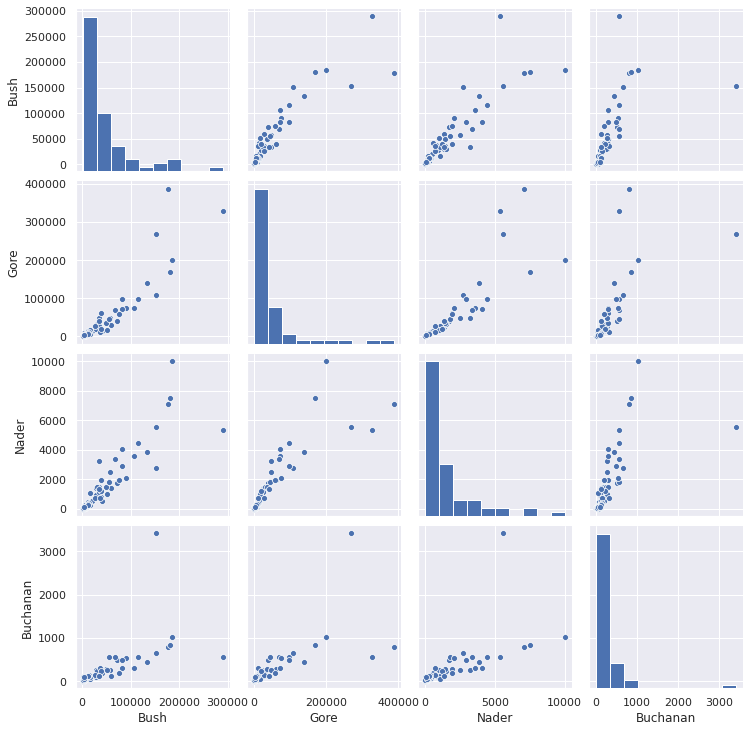

In [26]:
# plot a pair plot of the data using the seaborn library
# possible way to save the image
# plt.savefig('pair_plot.png', dpi = 300, bbox_inches = 'tight')

#sns.pairplot(votes)
#plt.savefig('votes_pair_plot.png', dpi = 300, bbox_inches = 'tight')

### 2b. Comment on the relationship between the quantiative datasets. Are they correlated? Collinear? [Peer Review]
You will answer this question in this week's Peer Review assignment.

### 2c. Multi-linear [5 pts, Peer Review]

Construct a multi-linear model called `model` without interaction terms predicting the Bush column on the other columns and print out the summary table. You should name your model's object as `model` in order to pass the autograder. Use the full data (not train-test split for now) and do not scale features.

In [44]:
# set response and predictors
response = votes[['Bush']]
predictors = sm.add_constant(votes[['Gore', 'Nader']])

# construct a multi-linear model 
model = sm.OLS(response, predictors).fit()

# look at summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Bush   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     224.4
Date:                Sat, 06 Sep 2025   Prob (F-statistic):           1.20e-29
Time:                        22:47:53   Log-Likelihood:                -758.77
No. Observations:                  67   AIC:                             1524.
Df Residuals:                      64   BIC:                             1530.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8223.1597   3095.188      2.657      0.0

In [60]:
# tests model

Is there any insignificant feature(s)? Explain your answer in this week's Peer Review assignment. 

### 2d. Multi-linear with interactions [Peer Review]

Construct a multi-linear model with interactions that are statistically significant at the $p = 0.05$ level. You can start with full interactions and then eliminate interactions that do not meet the $p = 0.05$ threshold. You will share your solution in this week's Peer Review assignment. 

Note: Name this model object as **`model_multi`**.

In [45]:
predictors = sm.add_constant(votes[['Gore', 'Nader']])

# subset data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(predictors, response, test_size = 0.2)

# construct a multi-linear model 
model_multi = sm.OLS(y_train, X_train).fit()

# look at summary
print(model_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                   Bush   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     177.3
Date:                Sat, 06 Sep 2025   Prob (F-statistic):           1.99e-23
Time:                        22:51:02   Log-Likelihood:                -604.62
No. Observations:                  53   AIC:                             1215.
Df Residuals:                      50   BIC:                             1221.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8215.7693   3817.239      2.152      0.0

In [62]:
# tests model_multi

In [33]:
# tests model_multi 
# your code here

y_predictions = model_multi.predict(X_test)

### 2e. Leverage [Peer Review]

Plot the *leverage* vs. the square of the residual.

These resources might be helpful    
- https://rpubs.com/Amrabdelhamed611/669768
- https://www.statsmodels.org/dev/generated/statsmodels.graphics.regressionplots.plot_leverage_resid2.html

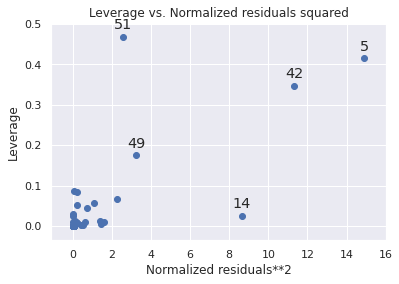

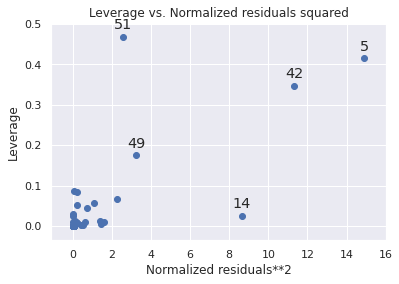

In [64]:
# plot the leverage vs. the square of the residual
# your code here
import statsmodels
statsmodels.graphics.regressionplots.plot_leverage_resid2(results, alpha=0.05)

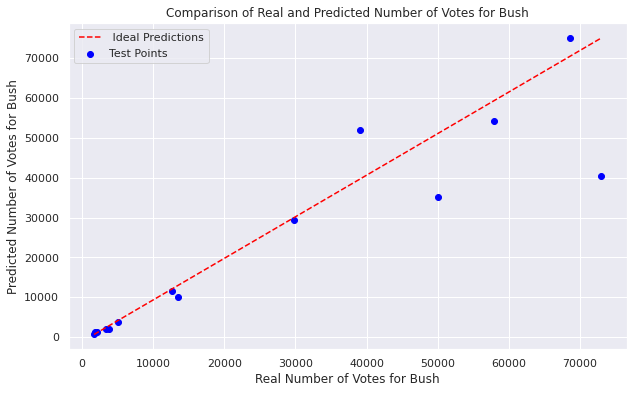

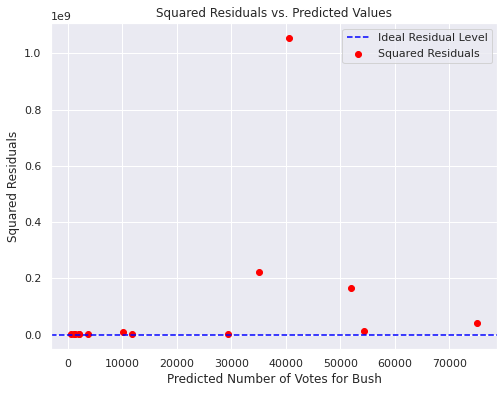

In [20]:
# you can use this cell to try different plots 
# your code here
'''
# real vs prediction scatter plot
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_predictions, color = "blue",  label = "Test Points")
plt.plot([min(y_test), max(y_test)], [min(y_predictions), max(y_predictions)], '--', color = "red", label = " Ideal Predictions")
plt.legend()
plt.xlabel("Real Number of Votes for Bush")
plt.ylabel("Predicted Number of Votes for Bush")
plt.title("Comparison of Real and Predicted Number of Votes for Bush")
plt.show()

# residuals scatter plot
residuals = (y_test - y_predictions)**2
plt.figure(figsize=(8, 6))
plt.scatter(y_predictions, residuals, color='red', label = "Squared Residuals")
plt.axhline(y=0, color='blue', linestyle='--', label = "Ideal Residual Level")
plt.xlabel('Predicted Number of Votes for Bush')
plt.ylabel('Squared Residuals')
plt.title('Squared Residuals vs. Predicted Values')
plt.legend()
plt.show()
'''

Upload your plot for this week's Peer Review assignment. If you tried out multiple models, upload a single model.

### 2f. Identify and Clean [5pts]

The leverage *vs* residual plot indicates that some rows have high leverage but small residuals and others have high residual. The $R^2$ of the model is determined by the residual. The data is from the disputed 2000 election [where one county](https://en.wikipedia.org/wiki/2000_United_States_presidential_election_recount_in_Florida) caused significant issues.

Display the *3 or more* rows for the points indicated having high leverage and/or high residual squared. You will use this to improve the model $R^2$.

Name the list of indices for those high-leverage and/or high-residual points as `unusual`.

In [65]:
# uncomment and fill unusual with list of indices for high-leverage and/or high-residual points
unusual = [51, 42, 5, 27, 49, 14]
# your code here
print(votes.iloc[unusual])

          county    Bush    Gore  Nader  Buchanan
51      Pinellas  184825  200630  10022      1013
42     MiamiDade  289533  328808   5352       560
5        Broward  177902  387703   7104       795
27  Hillsborough  180760  169557   7490       847
49     PalmBeach  152951  269732   5565      3411
14         Duval  152098  107864   2757       652


In [66]:
# tests your list of indices for high-leverage and/or high-residual points 

### 2g. Final model [5 pts]

Develop your final model by dropping *one or more* of the troublesome data points indicated in the leverage *vs* residual plot and insuring any interactions in your model are still significant at $p=0.05$. Your model should have an $R^2$ great than 0.95. Call your model `model_final`.

In [67]:
# develop your model_final here

# find out which counties in unsual list affects the model the most

# create power set of unusual
from itertools import chain, combinations

powerset = []
for ii in range(1, len(unusual) + 1): # make every combination possible from length 1 to full list
    combo_set_len_ii = list(combinations(unusual, ii))
    powerset.append(combo_set_len_ii)
powerset = list(chain.from_iterable(powerset))

# initialize best model results
best_r2 = 0
best_combo_removed = None

# make models with all possibilities and record which has highest R2 score
for combo in powerset: # combo is a tuple
    combo = list(combo)
    # remove rows in combo
    df = votes.drop(combo, axis = 0, inplace = False)
    
    # create model
    predictors = df[['Gore', 'Nader']]
    response = df['Bush']
    model = sm.OLS(response, predictors)
    results = model.fit()
    
    # get R2 value
    r2 = results.rsquared
    
    # compare model with previous best
    if r2 > best_r2:
        best_r2 = r2
        best_combo_removed = combo

print(best_r2)
print(best_combo_removed)

# create final model
votes.drop(best_combo_removed, axis = 0, inplace = True)
predictors = votes[['Gore', 'Nader']]
response = votes['Bush']
model = sm.OLS(response, predictors)
model_final = model.fit()
print(model_final.summary())

0.9676373317648229
[51, 5, 49, 14]
                                 OLS Regression Results                                
Dep. Variable:                   Bush   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              911.9
Date:                Sat, 06 Sep 2025   Prob (F-statistic):                    3.60e-46
Time:                        18:13:03   Log-Likelihood:                         -674.89
No. Observations:                  63   AIC:                                      1354.
Df Residuals:                      61   BIC:                                      1358.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
------

In [68]:
# tests model_final


## 3. Body Mass Index Model [20 points, Peer Review]

In this problem, you will first clean a data set and create a model to estimate body fat based on the common BMI measure. Then, you will use the **forward stepwise selection** method to create more accurate predictors for body fat.

The body density dataset in file `bodyfat` includes the following 15 variables listed from left to right:
* Density : Density determined from underwater weighing
* Fat : Percent body fat from Siri’s (1956) equation
* Age : Age (years)
* Weight : Weight (kg)
* Height : Height (cm)
* Neck : Neck circumference (cm)
* Chest: Chest circumference (cm)
* Abdomen : Abdomen circumference (cm)
* Hip : Hip circumference (cm)
* Thigh : Thigh circumference (cm)
* Knee : Knee circumference (cm)
* Ankle : Ankle circumference (cm)
* Biceps : Biceps (extended) circumference (cm)
* Forearm : Forearm circumference (cm)
* Wrist : Wrist circumference (cm)

The `Density` column is the "gold standard" -- it is a measure of body density obtained by dunking people in water and measuring the displacement. The `Fat` column is a prediction using another statistical model. The body mass index (BMI) is [calculated as Kg/m^2](https://en.wikipedia.org/wiki/Body_mass_index) and is used to classify people into different weight categories with a [BMI over 30 being 'obese'](https://www.medicalnewstoday.com/info/obesity). You will find that BMI is a poor predictor of the `Density` information it purports to predict. You will try to find better models using measurements and regression.

Unfortunately for us, the dataset we have has imperial units for weight and height, so we will convert those to metric and then calculate the BMI and plot the KDE of the data.

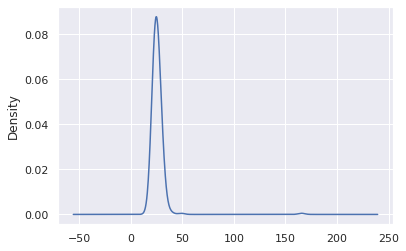

In [46]:
fat = pd.read_csv('data/bodyfat.csv')
fat = fat.drop('Unnamed: 0', axis=1)
fat.Weight = fat.Weight * 0.453592 # Convert to Kg
fat.Height = fat.Height * 0.0254 # convert inches to m
fat['BMI'] = fat.Weight / (fat.Height**2)
fat.BMI.plot.kde();

### 3a. [5 pts]
The BMI has at least one outlier since it's unlikely anyone has a BMI of 165, even [Arnold Schwarzenegger](http://www.health.com/health/gallery/0,,20460621,00.html).

Form a new table `cfat` (cleaned fat) that removes any rows with a BMI greater than 40 and calculate the regression model predicting the `Density` from the `BMI`. Display the summary of the regression model. Call your model as `bmi`. You should achieve an $R^2$ of at least 0.53.

In [47]:
# form new table cfat and model bmi
cfat = fat[fat['BMI'] <= 40]

# create model
response = cfat['Density']
predictor = sm.add_constant(cfat['BMI'])
model = sm.OLS(response, predictor)
bmi = model.fit()

print(bmi.summary())

                            OLS Regression Results                            
Dep. Variable:                Density   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     286.2
Date:                Sat, 06 Sep 2025   Prob (F-statistic):           3.25e-43
Time:                        22:53:48   Log-Likelihood:                 734.17
No. Observations:                 250   AIC:                            -1464.
Df Residuals:                     248   BIC:                            -1457.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1602      0.006    186.410      0.0

In [90]:
# tests your bmi model 

### 3b. [Peer Review]
Plot your regression model against the BMI measurement, properly labeling the scatterplot axes and showing the regression line. In subsequent models, you will not be able to plot the Density *vs* your predictors because you will have too many predictors, but it's useful to visually understand the relationship between the BMI predictor and the `Density` because you should find that the regression line goes through the data but there is too much variability in the data to achieve a good $R^2$.
Upload a copy or screensho of your plot for this week's Peer Review assignment. 

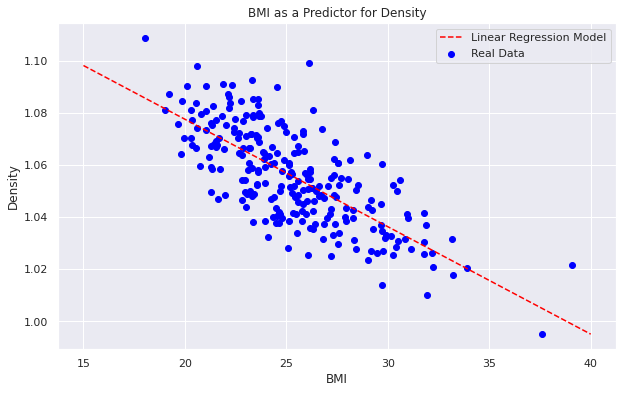

In [107]:
# plot regression model against BMI measurement
# properly label the scatterplot axs and show the regression line
# your code here

x = sm.add_constant(range(15, 41))
model_output = bmi.predict(x)
'''
plt.figure(figsize = (10, 6))
plt.scatter(cfat['BMI'], response, color = 'blue', label = 'Real Data')
plt.plot(range(15, 41), model_output, color = 'red', linestyle = '--', label = 'Linear Regression Model' )
plt.xlabel('BMI')
plt.ylabel('Density')
plt.title('BMI as a Predictor for Density')
plt.legend()
plt.show()
'''

 The `BMI` model uses easy-to-measure predictors, but has a poor $R^2 \sim 0.54$. We will use structured subset selection methods from ISLR Chapter 6.1 to derive two better predictors. That chapter covers *best subset*, *forward stepwise* and *backware stepwise* selection. I have implemented the *best subset* selection which searches across all combinations of $1, 2, \ldots, p$ predictors and selects the best predictor based on the $\textit{adjusted}~R^2$ metric. This method involved analyzing $2^{13} = 8192$ regression models (programming and computers for the win). The resulting $\textit{adjusted}~R^2$ plot is shown below (Since the data split can be different, your result may look slightly different):
 
 <img src='fat-best-rsqadj.png'>
 
In this plot, `test_fat` and `train_fat` datasets each containing 200 randomly selected samples were derived from the `cfat` dataset using `np.random.choice` over the `cfat.index` and selected using the Pandas `loc` method. Then, following the algorithm of ISLR Algorithm 6.1 *Best Subset Selection*, all $p \choose k$ models with $k$ predictors were evaluated on the training data and the model returning the best $\textit{Adjusted}~R^2$ was selected. These models are indicated by the data points for the solid blue line. As the text indicates, other measures (AIC, BIC, $C_p$) would be better than the $\textit{Adjusted}~R^2$, but we use it becuase because you've already seen the $R^2$ and should have an understanding of what it means.

Then, the best models for each $k$ were evaluated for the `test_fat` data. These results are shown as the red dots below the blue line. Note that because the test and train datasets are randomly selected subsets, the results vary from run-to-run and it may that your test data produces better $R^2$ than your training data.

In the following exercises, you can not use the `Density`, `Fat` or `BMI` columns in your predictive models. You can only use the 13 predictors in the `allowed_factors` list.

In [108]:
allowed_factors = ['Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist']

## Forward Stepwise Refinement

You will manually perform the steps of the *forward stepwise selection* method for four parameters. You will do this following Algorithm 6.2 from ISLR. For $k = 1\ldots 4$:
* Set up a regression model with $k$ factors that involves the fixed predictors from the previous step $k-1$
* Try all $p$ predictors in the new $k$th position
* Select the best parameter using $\textit{Adjusted}-R^2$ (e.g. `model.rsquared_adj`) given your training data
* Fix the new parameter and continue the process for $k+1$

Then, you will construct a plot similar to the one above, plotting the $\textit{Adjusted}-R^2$ for each of your $k$ steps and plotting the $\textit{Adjusted}-R^2$ from the test set using that model.

### 3c. [5 pts]
First, construct your training and test sets from your `cfat` dataset. Call the resulting data frame to train_fat and test_fat. train_fat includes randomly selected 125 observations and the test_fat has the rest.

Note: Set **random_state = 0** in sklearn's split function

In [112]:
# construct train_fat and test_fat from cfat dataset 
X = cfat[allowed_factors]
y = cfat['Density']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 0)

train_fat = pd.concat([X_train, y_train], axis = 1)
test_fat = pd.concat([X_test, y_test], axis = 1)

In [ ]:
# tests your training and test sets 

### 3d. Conduct the algorithm above for $k=1$, leaving your best solution as the answer [5 pts]
Call your resulting model `train_bmi1`.

In [115]:
best = ['',0]
for p in allowed_factors:
    model  = smf.ols(formula='Density~'+p, data=train_fat).fit()
    print(p, model.rsquared)
    if model.rsquared>best[1]:
        best = [p, model.rsquared]
print('best:',best)

Age 0.11891818526391695
Weight 0.3118316510507495
Height 0.013604499535144865
Neck 0.2365970437510022
Chest 0.48319067404353544
Abdomen 0.6569981103212716
Hip 0.309611004446523
Thigh 0.20523437265112665
Knee 0.14348108465750553
Ankle 0.08478533257962062
Biceps 0.23065760452385575
Forearm 0.08974003323360791
Wrist 0.10016498175577282
best: ['Abdomen', 0.6569981103212716]


In [124]:
# uncomment and update your solution 
train_bmi1 = smf.ols(formula = 'Density~' + best[0], data = train_fat).fit()

In [125]:
# tests train_bmi1 model 

### 3e. Conduct the algorithm above for $k=2$, leaving your best solution as the answer [Peer Review]
Name your model object as `train_bmi2`.<br>
Look at this week's Peer Review assignment for questions about $k=2$ through $k=5$. 

In [140]:
# your code here
def try_K_Factors(k):
    # create combinations
    combos = list(combinations(allowed_factors, k))
    
    # initialize best combo results
    best_r2 = 0
    best_model = None
    
    # create a model for each combo
    for combo in combos: # combo is a tuple
        
        # create formula for combo
        predictor_set = combo[0]
        for ii in range(1, k):
            predictor_set += ' + ' + combo[ii]
            
        # create model and check if best r2
        model = smf.ols(formula = 'Density~' + predictor_set, data = train_fat).fit()
        r2 = model.rsquared_adj
        if r2 > best_r2:
            print(f'New Best\t{combo}: {r2}')
            best_r2 = r2
            best_model = model
            
    return best_model

train_bmi2 = try_K_Factors(2)
print(train_bmi2.summary())

New Best	('Age', 'Weight'): 0.4475999305577266
New Best	('Age', 'Chest'): 0.5249486560164074
New Best	('Age', 'Abdomen'): 0.6714906315418783
New Best	('Weight', 'Abdomen'): 0.729896854742415
                            OLS Regression Results                            
Dep. Variable:                Density   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     168.5
Date:                Sat, 06 Sep 2025   Prob (F-statistic):           7.81e-36
Time:                        20:09:42   Log-Likelihood:                 396.16
No. Observations:                 125   AIC:                            -786.3
Df Residuals:                     122   BIC:                            -777.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 co

### 3f. Conduct the algorithm above for $k=3$, leaving your best solution as the answer [Peer Review]

In [141]:
# your code here

train_bmi3 = try_K_Factors(3)
print(train_bmi3.summary())

New Best	('Age', 'Weight', 'Height'): 0.5550390434149606
New Best	('Age', 'Weight', 'Abdomen'): 0.728353339947768
New Best	('Weight', 'Neck', 'Abdomen'): 0.7285034910725998
New Best	('Weight', 'Chest', 'Abdomen'): 0.7296111205792996
New Best	('Weight', 'Abdomen', 'Hip'): 0.7339338096479797
New Best	('Weight', 'Abdomen', 'Biceps'): 0.7441772156787976
                            OLS Regression Results                            
Dep. Variable:                Density   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     121.2
Date:                Sat, 06 Sep 2025   Prob (F-statistic):           2.64e-36
Time:                        20:09:49   Log-Likelihood:                 400.07
No. Observations:                 125   AIC:                            -792.1
Df Residuals:                     121   BIC:                            -780.8
Df Model:       

### 3g. Conduct the algorithm above for $k=4$, leaving your best solution as the answer [Peer Review]

In [142]:
# your code here

train_bmi4 = try_K_Factors(4)
print(train_bmi4.summary())

New Best	('Age', 'Weight', 'Height', 'Neck'): 0.5574780246380864
New Best	('Age', 'Weight', 'Height', 'Abdomen'): 0.7268655416072958
New Best	('Age', 'Weight', 'Chest', 'Abdomen'): 0.7278383793219898
New Best	('Age', 'Weight', 'Abdomen', 'Hip'): 0.7351369774660594
New Best	('Age', 'Weight', 'Abdomen', 'Biceps'): 0.742350661350443
New Best	('Weight', 'Height', 'Abdomen', 'Biceps'): 0.7447607570477379
New Best	('Weight', 'Neck', 'Abdomen', 'Biceps'): 0.7466437237824024
New Best	('Weight', 'Abdomen', 'Hip', 'Biceps'): 0.7470568641594065
New Best	('Weight', 'Abdomen', 'Biceps', 'Wrist'): 0.7506001901244437
                            OLS Regression Results                            
Dep. Variable:                Density   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     94.30
Date:                Sat, 06 Sep 2025   Prob (F-statistic):           4.24

### 3h. Conduct the algorithm above for $k=5$, leaving your best solution as the answer [Peer Review]

In [143]:
# your code here

train_bmi5 = try_K_Factors(5)
print(train_bmi5.summary())

New Best	('Age', 'Weight', 'Height', 'Neck', 'Chest'): 0.5598738669373766
New Best	('Age', 'Weight', 'Height', 'Neck', 'Abdomen'): 0.7249729940136951
New Best	('Age', 'Weight', 'Height', 'Chest', 'Abdomen'): 0.7256491913084523
New Best	('Age', 'Weight', 'Height', 'Abdomen', 'Hip'): 0.733268268391966
New Best	('Age', 'Weight', 'Height', 'Abdomen', 'Biceps'): 0.743499263732375
New Best	('Age', 'Weight', 'Neck', 'Abdomen', 'Biceps'): 0.74454562790079
New Best	('Age', 'Weight', 'Abdomen', 'Hip', 'Biceps'): 0.747090825245902
New Best	('Age', 'Weight', 'Abdomen', 'Biceps', 'Wrist'): 0.7494193480231326
New Best	('Age', 'Abdomen', 'Hip', 'Biceps', 'Wrist'): 0.7497142113657327
New Best	('Weight', 'Height', 'Abdomen', 'Biceps', 'Wrist'): 0.7511576108898337
New Best	('Weight', 'Neck', 'Abdomen', 'Hip', 'Biceps'): 0.7523675213710699
New Best	('Weight', 'Abdomen', 'Hip', 'Biceps', 'Wrist'): 0.7578732528786717
                            OLS Regression Results                            
Dep. Variab

### 3i. Plot [5 pts]
Plot your resulting $\textit{adjusted}~R^2$ *vs* number of predictors (k=1,2,3,4,5) and overlay the $\textit{adjusted}~R^2$ for the test data. Call the list of the five adjusted r-squared values from the five train_bmi# models as `adjr2_train` and the one from the test data as `adjr2_test`.

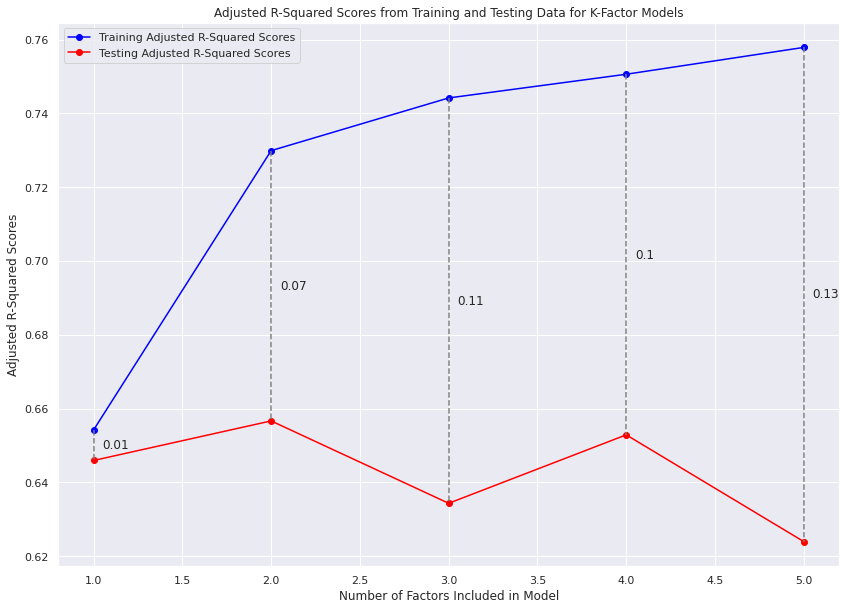

In [167]:
# plot resulting adjusted rsquared vs number of predictors (k=1,2,3,4,5)
# overlay the adjusted rsquared for the test data 

adjr2_train = [train_bmi1.rsquared_adj, train_bmi2.rsquared_adj, train_bmi3.rsquared_adj, train_bmi4.rsquared_adj, train_bmi5.rsquared_adj]
k = range(1, 6)

# calculate TSS
tss = np.sum((y_test - np.mean(y_test))**2)
n = len(test_fat)

# make iterable of each model
models = [train_bmi1, train_bmi2, train_bmi3, train_bmi4, train_bmi5]

# get predictions and adjusted r2 for each model
adjr2_test = []
for ii in range(len(models)):
    model = models[ii]
    predictions = model.predict(test_fat)
    rss = np.sum((y_test - predictions)**2)
    r2 = 1 - (rss/tss)
    
    p = k[ii]
    adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
    adjr2_test.append(adj_r2)

# make distance bars
dist = []
for ii in range(len(adjr2_train)):
    diff = adjr2_train[ii] - adjr2_test[ii]
    dist.append(round(diff, 2))
'''
plt.figure(figsize = (14, 10))
plt.plot(k, adjr2_train, color = "blue", marker = 'o', label = "Training Adjusted R-Squared Scores")
plt.plot(k, adjr2_test, color = "red", marker = 'o', label = "Testing Adjusted R-Squared Scores")
for ii in range(len(dist)):
    x = k[ii]
    train_y = adjr2_train[ii]
    test_y = adjr2_test[ii]
    plt.plot([x, x], [train_y, test_y], color = 'gray', linestyle = '--')
    plt.text(x + 0.05, (train_y + test_y)/2, f'{dist[ii]}', verticalalignment = 'center')
plt.ylabel("Adjusted R-Squared Scores")
plt.xlabel('Number of Factors Included in Model')
plt.title("Adjusted R-Squared Scores from Training and Testing Data for K-Factor Models")
plt.legend()
plt.show()
'''

In [ ]:
# tests adjusted r-squared plot vs. number of factors 

### 3j. Discussion [Peer Review]
The BMI model has the benefit being simple (two measurements, height and wright). Looking at your resulting regression model, how many parameters would you suggest to use for your enhanced BMI model? Justify your answer using your models. Submit your answer with this week's Peer Review assignment. 